In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

In [4]:
properties_t=properties.transpose()
properties_t=properties_t.reset_index()
properties_t.columns=properties_t.iloc[0]
properties_t = properties_t.rename(columns={'Unnamed: 0':'London Borough',pd.NaT:'ID'})
properties_t = properties_t.drop([0])


In [5]:
clean_properties=pd.melt(properties_t, id_vars=['London Borough', 'ID'], var_name='Month', value_name='Average_price')
clean_properties['Average_price']=pd.to_numeric(clean_properties['Average_price'])

In [6]:
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']
clean_properties=clean_properties[~clean_properties['London Borough'].isin (nonBoroughs)]
df=clean_properties.copy()

In [24]:
df=df.dropna()

# Trend of average price of boroughs in the last decade

[]

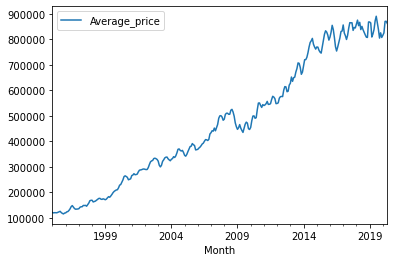

In [25]:
df[df['London Borough'] =='Camden'].plot(x='Month', y='Average_price')
plt.plot()

In [26]:
df['Year'] = df['Month'].apply(lambda t:t.year)
def create_price_ratio(dfg):
    avg_1998=dfg[dfg['Year']==1998].Average_price.mean()
    avg_2018=dfg[dfg['Year']==2018].Average_price.mean()
    return avg_2018/avg_1998


uniq_borough= df['London Borough'].unique()
price_ratio = {}

for borough in uniq_borough:
    price_ratio[borough]=create_price_ratio(df[df['London Borough']==borough])
                        
print(price_ratio)    
    

{'City of London': 5.301620377587609, 'Barking & Dagenham': 4.89661861291754, 'Barnet': 4.358195917538044, 'Bexley': 4.248977046127877, 'Brent': 4.8945544971392865, 'Bromley': 4.0947846853338765, 'Camden': 4.935353408884261, 'Croydon': 4.201100280024767, 'Ealing': 4.311450902121834, 'Enfield': 4.26347158349581, 'Greenwich': 4.763036347329193, 'Hackney': 6.198285561008662, 'Hammersmith & Fulham': 4.137798101936229, 'Haringey': 5.134624964136042, 'Harrow': 4.0591964329643195, 'Havering': 4.325230371335308, 'Hillingdon': 4.2002730803844575, 'Hounslow': 3.976409106143329, 'Islington': 4.844048012802298, 'Kensington & Chelsea': 5.082465066092464, 'Kingston upon Thames': 4.270549521484271, 'Lambeth': 4.957751163514063, 'Lewisham': 5.449221041059685, 'Merton': 4.741273313294604, 'Newham': 5.305390437201879, 'Redbridge': 4.471182006097364, 'Richmond upon Thames': 4.005161895721457, 'Southwark': 5.516485302379376, 'Sutton': 4.118522608573157, 'Tower Hamlets': 4.62670104006116, 'Waltham Forest':

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


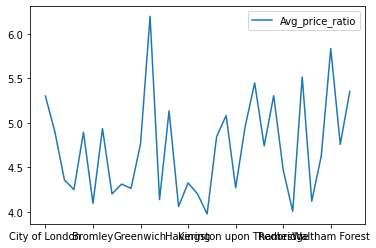

In [27]:
boroughs=pd.DataFrame(price_ratio, index=[0])
boroughs_t=boroughs.transpose()
boroughs_t.columns=['Avg_price_ratio']

boroughs_t.plot()
plt.show()

In [28]:
boroughs.head()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,5.30162,4.896619,4.358196,4.248977,4.894554,4.094785,4.935353,4.2011,4.311451,4.263472,...,4.741273,5.30539,4.471182,4.005162,5.516485,4.118523,4.626701,5.834756,4.757709,5.353565


In [29]:
df.head()

,London Borough,ID,Month,Average_price,Year
0,City of London,E09000001,1995-01-01,91448.98487,1995
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660,1995
2,Barnet,E09000003,1995-01-01,93284.51832,1995
3,Bexley,E09000004,1995-01-01,64958.09036,1995
4,Brent,E09000005,1995-01-01,71306.56698,1995


In [30]:
df[df['Average_price'] == df['Average_price'].max()]

,London Borough,ID,Month,Average_price,Year
13267,Kensington & Chelsea,E09000020,2018-01-01,1463377.921,2018


In [31]:
df[df['Average_price'] == df['Average_price'].min()]

,London Borough,ID,Month,Average_price,Year
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266,1995


In [32]:
boroughs_t.head()

,Avg_price_ratio
City of London,5.301620
Barking & Dagenham,4.896619
Barnet,4.358196
Bexley,4.248977
Brent,4.894554


In [33]:
boroughs_t[boroughs_t['Avg_price_ratio'] == boroughs_t['Avg_price_ratio'].max()]

,Avg_price_ratio
Hackney,6.198286


In [34]:
boroughs_t['Avg_price_ratio'].sort_values(ascending=False)

Hackney                 6.198286
Waltham Forest          5.834756
Southwark               5.516485
Lewisham                5.449221
Westminster             5.353565
Newham                  5.305390
City of London          5.301620
Haringey                5.134625
Kensington & Chelsea    5.082465
Lambeth                 4.957751
Camden                  4.935353
Barking & Dagenham      4.896619
Brent                   4.894554
Islington               4.844048
Greenwich               4.763036
Wandsworth              4.757709
Merton                  4.741273
Tower Hamlets           4.626701
Redbridge               4.471182
Barnet                  4.358196
Havering                4.325230
Ealing                  4.311451
Kingston upon Thames    4.270550
Enfield                 4.263472
Bexley                  4.248977
Croydon                 4.201100
Hillingdon              4.200273
Hammersmith & Fulham    4.137798
Sutton                  4.118523
Bromley                 4.094785
Harrow    

# Conclusion

The average price of the housing in boroughs has been increasing. The increase has been between about 40% and 60%.
Hackney has seen the greatest increase in hosuing prices in the last 2 decades. Next is Waltham Forest and Southwark.
Hunslow has the least increase in the last 2 decades.

